In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv(r"F:\KaggleDataset\weight-height\weight-height.csv")

In [8]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

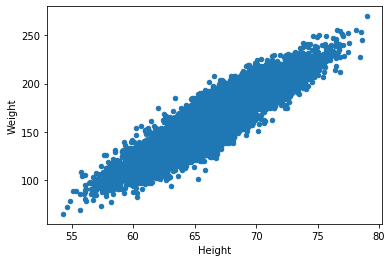

In [10]:
df.plot(kind = 'scatter', x = 'Height', y = 'Weight')

In [11]:
males = df[df['Gender'] == 'Male']

females = df[df['Gender'] == 'Female']

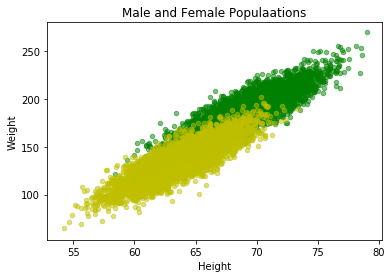

In [28]:
fix, ax = plt.subplots()

males.plot(kind = 'scatter', x='Height', y= 'Weight', 
           ax=ax, color= 'g', alpha=0.5,
            title = 'Male and Female Populaations')

females.plot(kind = 'scatter', x='Height', y= 'Weight', 
             ax=ax, color= 'y', alpha=0.5,
             title = 'Male and Female Populaations');

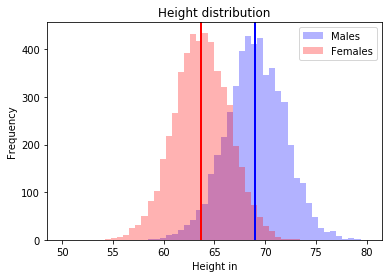

In [30]:
males['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='blue')
females['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='red')
plt.title('Height distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height in')
plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red',linewidth=2);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


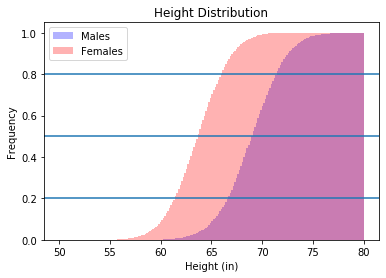

In [31]:
males['Height'].plot(kind='hist',bins=200,range=(50,80),alpha=0.3,color='blue',cumulative=True,normed=True)
females['Height'].plot(kind='hist',bins=200,range=(50,80),alpha=0.3,color='red',cumulative=True,normed=True)

plt.title('Height Distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height (in)')

plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2);

In [32]:
dfpvt=df.pivot(columns='Gender',values='Weight')
dfpvt.head(2)

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473


Text(0, 0.5, 'Weight (lb)')

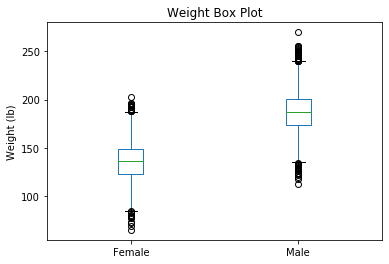

In [33]:
dfpvt.plot(kind='box');
plt.title('Weight Box Plot')
plt.ylabel('Weight (lb)')

In [49]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [34]:
X = df['Height'].values[:,None]
X.shape

(10000, 1)

In [35]:
y = df.iloc[:,2].values
y.shape

(10000,)

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
model.score(X_train, y_train)

0.8545053200432668

In [59]:
y_test = model.predict(X_test)

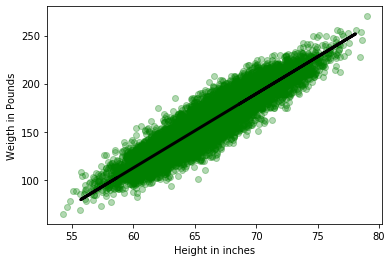

In [60]:
plt.scatter(X, y, color = 'g', alpha = 0.3)
plt.plot(X_test, y_test, color = 'black', linewidth = 3)
plt.xlabel('Height in inches')
plt.ylabel('Weigth in Pounds')
plt.show()

In [61]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [62]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [63]:
print("The Mean Squared Error on Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on Train set is:	149.4
The Mean Squared Error on Test set is:	0.0


In [64]:
print("The R2 score on the Train set is:\t{:0.1f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.1f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.9
The R2 score on the Test set is:	1.0
